<a href="https://colab.research.google.com/github/junwoochoi33/NLPPractice/blob/main/nlp_01_practice_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. RNN

In [2]:
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [5]:
char2vec = {
    'h':np.array([1,0,0,0,0]),
    'e':np.array([0,1,0,0,0]),
    'l':np.array([0,0,1,0,0]),
    'o':np.array([0,0,0,1,0]),
    '<EOS>':np.array([0,0,0,0,1])
}

idx2char = ['h', 'e', 'l', 'o', '<EOS>']

In [7]:
print(char2vec['l'])

[0 0 1 0 0]


In [8]:
print(idx2char[2])

l


In [9]:
from tensorflow.keras.layers import Embedding

inputs = Input(shape=())
embedded = Embedding(input_dim=5, output_dim=2)(inputs)

model = Model(inputs, embedded)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers[1].get_weights()

[array([[ 4.5608331e-02, -4.6810735e-02],
        [-4.6173133e-02,  4.2100325e-03],
        [ 2.2415433e-02, -4.0348984e-02],
        [ 8.5901245e-03, -3.0488515e-02],
        [-1.1693686e-05,  9.2546716e-03]], dtype=float32)]

In [15]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K

# 데이터 (가짜 입력 시퀀스: 10개 샘플, 각 샘플은 최대 길이 5)
x_data = [
    [1, 4, 2],
    [3, 2, 1, 5],
    [6],
    [4, 3, 2, 1],
    [3, 1],
    [1, 2],
    [5, 4, 3],
    [2],
    [3, 3, 1, 1],
    [4, 2]
]

# 레이블 (0 또는 1)
y_data = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

# 시퀀스 패딩 (최대 길이 5로 맞춤)
padded_x = pad_sequences(x_data, maxlen=5)

# 세션 초기화
K.clear_session()

# 모델 정의
inputs = Input(shape=(5,))
x = Embedding(input_dim=10, output_dim=8, input_length=5)(inputs)
x = SimpleRNN(units=4)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

# 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 훈련
model.fit(padded_x, y_data, epochs=10, verbose=1)

# 예측
predictions = model.predict(padded_x)
print(predictions)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6828
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8000 - loss: 0.6791
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8000 - loss: 0.6755
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9000 - loss: 0.6718
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9000 - loss: 0.6682
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9000 - loss: 0.6646
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9000 - loss: 0.6610
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9000 - loss: 0.6574
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9000 - loss: 0.6537
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9000 - loss: 0.6501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[0.45639515]
 [0.5337357 ]
 [0.4802915 ]
 [0.51969934]
 [0.48403272]
 [0.46867812]
 [0.48886022]
 [0.47833923]
 [0.5300197 ]
 [0.46365052]]


## 2. 소프트맥스 함수

In [16]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # 안정성 향상을 위해 최대값을 빼줌
    return e_x / np.sum(e_x, axis=-1)

## 3. RNN 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


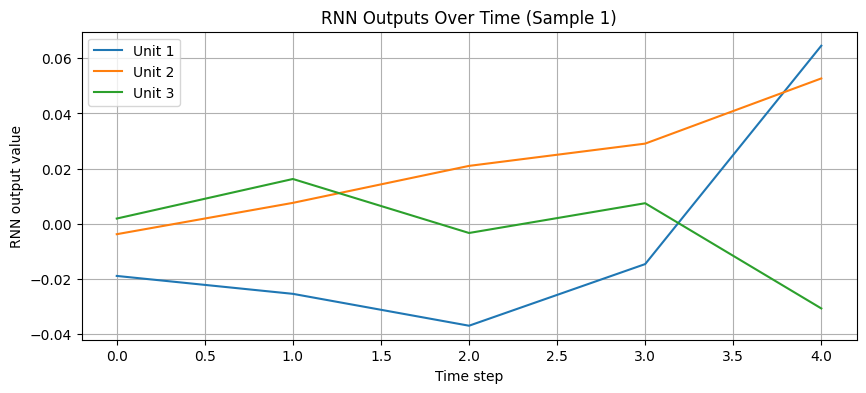

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K

# 샘플 입력 시퀀스 (10개 샘플, 각 샘플 길이 다름 → 패딩)
x_data = [
    [1, 2, 3],
    [4, 5],
    [6],
    [1, 3, 5, 7],
    [2, 4, 6],
    [7, 8],
    [9],
    [2, 3, 4, 5],
    [3, 6, 9],
    [8, 5]
]

# 시퀀스 패딩
max_len = 5
padded_x = pad_sequences(x_data, maxlen=max_len)

# 세션 초기화
K.clear_session()

# 모델 정의 (return_sequences=True로 시각화에 필요)
inputs = Input(shape=(max_len,))
x = Embedding(input_dim=20, output_dim=4, input_length=max_len)(inputs)
rnn_out = SimpleRNN(units=3, return_sequences=True)(x)  # 시퀀스마다 출력
model = Model(inputs, rnn_out)

# 시퀀스별 RNN 출력 얻기
output = model.predict(padded_x)

# 시각화: 첫 번째 샘플의 RNN 출력 (타임스텝마다 벡터)
sample = output[0]  # shape: (5, 3)

plt.figure(figsize=(10, 4))
for i in range(sample.shape[1]):
    plt.plot(range(max_len), sample[:, i], label=f'Unit {i+1}')
plt.title("RNN Outputs Over Time (Sample 1)")
plt.xlabel("Time step")
plt.ylabel("RNN output value")
plt.legend()
plt.grid(True)
plt.show()
